In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Define class names and labels
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
# Number of classes
nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)  # Image size for resizing

In [3]:
def load_data():
    dataset_path = r'Downloads/Alzheimers disease detection/Alzheimers disease detection'  # Path to the dataset
    images = []
    labels = []

    print("Loading dataset...")

    # Iterate through each folder corresponding to a category (train/test folders)
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        
        if os.path.isdir(folder_path):  # Only process directories
            print(f"Processing folder: {folder}")
            
            for subfolder in os.listdir(folder_path):
                if subfolder in class_names_label:
                    label = class_names_label[subfolder]
                    subfolder_path = os.path.join(folder_path, subfolder)

                    # Iterate through each image in the subfolder
                    for file in tqdm(os.listdir(subfolder_path)):
                        # Get the path name of the image
                        img_path = os.path.join(subfolder_path, file)

                        try:
                            # Open and resize the image
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
                            if img is None:
                                print(f"Warning: Unable to load image {img_path}")
                                continue  # Skip invalid images

                            img = cv2.resize(img, IMAGE_SIZE)
                            img = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale
                            img = np.repeat(img, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel

                            # Append the image and its corresponding label to the output
                            images.append(img)
                            labels.append(label)

                        except Exception as e:
                            print(f"Error processing image {img_path}: {e}")
                            continue  # Skip images that can't be processed

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    if len(images) == 0:
        raise ValueError("No images were loaded. Please check the dataset path and structure.")
    
    print(f"Loaded {len(images)} images and {len(labels)} labels.")
    return images, labels

Loading dataset...
Processing folder: test


100%|██████████| 143/143 [00:00<00:00, 456.78it/s]


Processing folder: train


100%|██████████| 143/143 [00:00<00:00, 593.82it/s]


Loaded 990 images and 990 labels.
Number of training examples: 792
Number of testing examples: 198
Each image is of size: (150, 150)


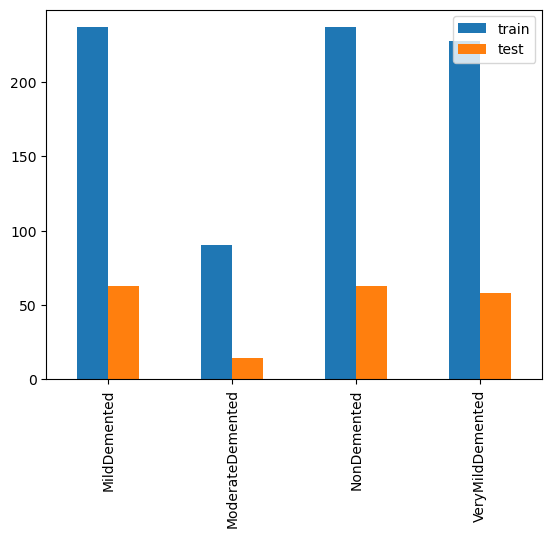

Text(0.5, 1.0, 'Proportion of each observed categories in the dataset')

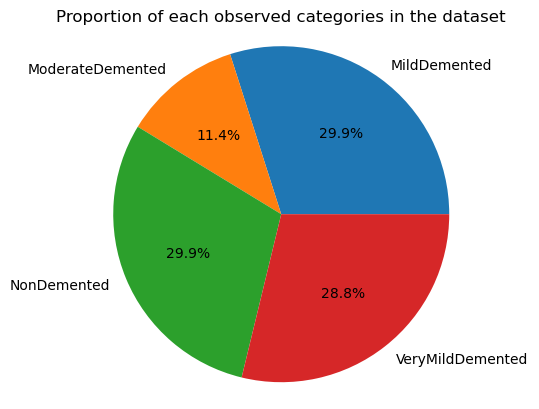

In [5]:
# Load dataset
images, labels = load_data()

# Check if images were loaded successfully
if len(images) == 0:
    print("Error: No images loaded. Exiting...")
else:
    # Normalize images to be in the range [0, 1]
    images = images / 255.0

    # Split the data into training and testing sets (80% train, 20% test)
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Print dataset statistics
    print("Number of training examples: {}".format(train_labels.shape[0]))
    print("Number of testing examples: {}".format(test_labels.shape[0]))
    print("Each image is of size: {}".format(IMAGE_SIZE))

    # Display the distribution of classes in the train and test datasets (Histogram and Pie chart)
    _, train_counts = np.unique(train_labels, return_counts=True)
    _, test_counts = np.unique(test_labels, return_counts=True)

import pandas as pd
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()
plt.pie(train_counts,
    explode=(0,0,0,0),
    labels=class_names,
    autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed categories in the dataset')

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.3396 - loss: 1.3848 - val_accuracy: 0.2767 - val_loss: 1.3320
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3413 - loss: 1.3166 - val_accuracy: 0.4906 - val_loss: 1.2457
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5023 - loss: 1.2515 - val_accuracy: 0.4969 - val_loss: 1.1356
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5826 - loss: 1.0383 - val_accuracy: 0.5472 - val_loss: 1.0173
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.6181 - loss: 0.9234 - val_accuracy: 0.5975 - val_loss: 0.9271
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6998 - loss: 0.8094 - val_accuracy: 0.6038 - val_loss: 0.9009
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6943 - loss: 0.7302 - val_accuracy: 0.6792 - val_loss: 0.8474
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.7478 - loss: 0.6264 - val_accuracy: 0.5912 - val_loss: 0.8557
Epoch 9/

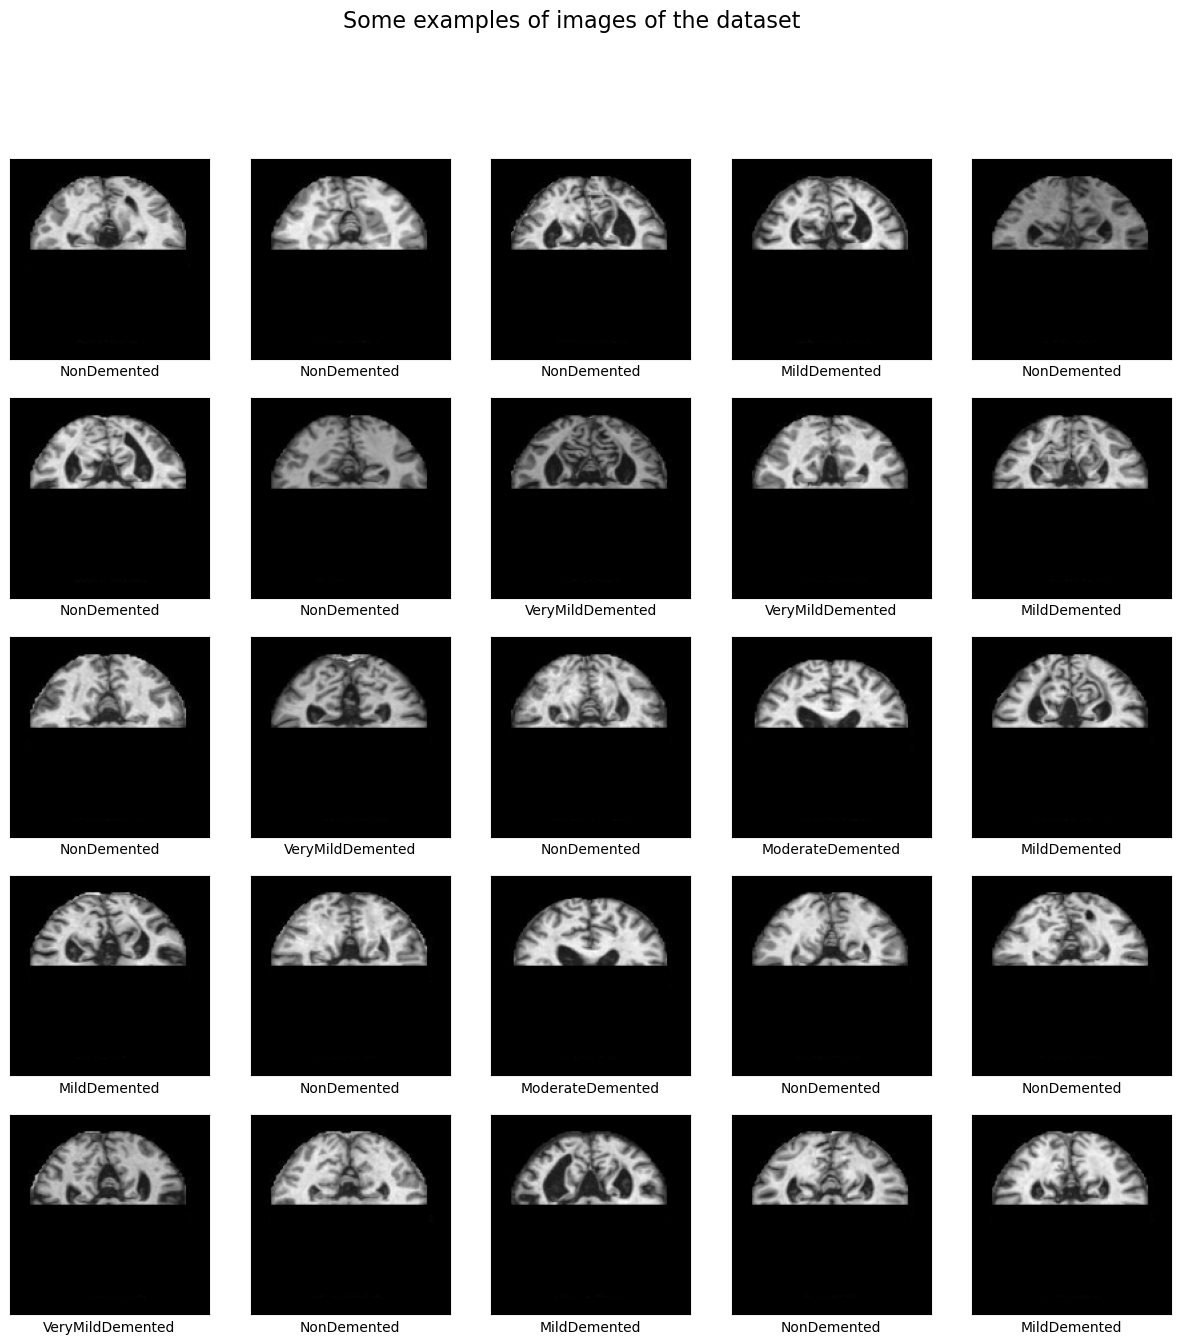

In [9]:
  # Model definition
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 3 channels for RGB
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)  # Output layer with nb_classes neurons
    ])

    # Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.2)

    # Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

    # Function to display examples from the dataset
def display_examples(class_names, images, labels):
        fig = plt.figure(figsize=(15, 15))
        fig.suptitle("Some examples of images of the dataset", fontsize=16)
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(images[i], cmap=plt.cm.binary)
            plt.xlabel(class_names[labels[i]])
        plt.show()

    # Display examples from the training set
display_examples(class_names, train_images, train_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


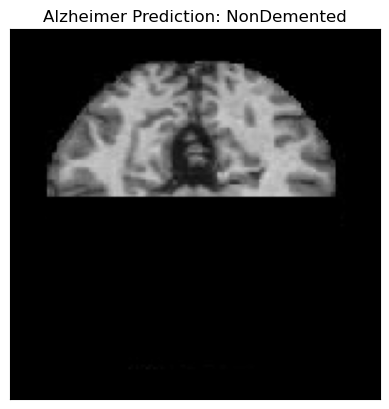

In [8]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"Downloads/Alzheimers disease detection/Alzheimers disease detection/train/NonDemented/nonDem1.jpg", target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
pred_labels = np.argmax(predictions, axis=1)
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[0].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Alzheimer Prediction: ' + class_names[pred_labels[0]])
plt.show()